In [2]:
#저번 마지막 문제

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

x = tf.placeholder("float", [None,784])
y_onehot = tf.placeholder("float", [None, 10])
y_label = tf.argmax(y_onehot, axis = 1)
W = tf.Variable(tf.random_uniform([784,10], -1, 1))
b = tf.Variable(tf.ones([10]))
y = tf.matmul(x, W) + b
y_hat = tf.nn.softmax(y)
y_predict = tf.argmax(y_hat, axis = 1)
correction_prediction = tf.equal(y_predict, y_label)
accuracy = tf.reduce_mean(tf.cast(correction_prediction, "float"))
loss = - tf.reduce_sum(y_onehot*tf.log(y_hat), axis = 1)
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
for i in range(1, 4):
    for j in range(1, 601):
        batch_xs, batch_ys = mnist.test.next_batch(100)
        sess.run(train, feed_dict = {x : batch_xs, y_onehot: batch_ys})
    print('%d 에폭 정확도'%i, sess.run(accuracy, feed_dict = {x : batch_xs, y_onehot : batch_ys}))

sess.close()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
1 에폭 정확도 0.95
2 에폭 정확도 0.94
3 에폭 정확도 0.95


In [16]:
#문제 36. 문제 35번까지 만든 단층 신경망에 가중치 초기화를 he를 달아서 학습 시키시오 !

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

tf.reset_default_graph()
x = tf.placeholder("float", [None,784])
y_onehot = tf.placeholder("float", [None, 10])
y_label = tf.argmax(y_onehot, axis = 1)
W = tf.get_variable(name="W", shape=[784, 10], initializer=tf.contrib.layers.xavier_initializer()) # xavier 초기값
# W = tf.get_variable(name='W', shape=[784, 10], initializer=tf.contrib.layers.variance_scaling_initializer()) # he 초기값
b = tf.Variable(tf.ones([10]))
y = tf.matmul(x, W) + b
y_hat = tf.nn.softmax(y)
y_predict = tf.argmax(y_hat, axis = 1)
correction_prediction = tf.equal(y_predict, y_label)
accuracy = tf.reduce_mean(tf.cast(correction_prediction, "float"))
loss = - tf.reduce_sum(y_onehot*tf.log(y_hat), axis = 1)
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
for i in range(1, 20):
    for j in range(1, 601):
        batch_xs, batch_ys = mnist.test.next_batch(100)
        sess.run(train, feed_dict = {x : batch_xs, y_onehot: batch_ys})
    print('%d 에폭 정확도'%i, sess.run(accuracy, feed_dict = {x : batch_xs, y_onehot : batch_ys}))

sess.close()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
1 에폭 정확도 0.9
2 에폭 정확도 0.92
3 에폭 정확도 0.99
4 에폭 정확도 0.08
5 에폭 정확도 0.1
6 에폭 정확도 0.06
7 에폭 정확도 0.14
8 에폭 정확도 0.08
9 에폭 정확도 0.1
10 에폭 정확도 0.1
11 에폭 정확도 0.06
12 에폭 정확도 0.06
13 에폭 정확도 0.15
14 에폭 정확도 0.11
15 에폭 정확도 0.09
16 에폭 정확도 0.1
17 에폭 정확도 0.07
18 에폭 정확도 0.13
19 에폭 정확도 0.14


In [23]:
#문제 37. learning rate를 0.05로 해서 다시 학습 시키시오 !

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

tf.reset_default_graph()
x = tf.placeholder("float", [None,784])
y_onehot = tf.placeholder("float", [None, 10])
y_label = tf.argmax(y_onehot, axis = 1)
# W = tf.get_variable(name="W", shape=[784, 10], initializer=tf.contrib.layers.xavier_initializer()) # xavier 초기값
W = tf.get_variable(name='W', shape=[784, 10], initializer=tf.contrib.layers.variance_scaling_initializer()) # he 초기값
b = tf.Variable(tf.ones([10]))
y = tf.matmul(x, W) + b
y_hat = tf.nn.softmax(y)
y_predict = tf.argmax(y_hat, axis = 1)
correction_prediction = tf.equal(y_predict, y_label)
accuracy = tf.reduce_mean(tf.cast(correction_prediction, "float"))
loss = - tf.reduce_sum(y_onehot*tf.log(y_hat), axis = 1)
optimizer = tf.train.AdamOptimizer(learning_rate=0.05)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
for i in range(1, 20):
    for j in range(1, 601):
        batch_xs, batch_ys = mnist.test.next_batch(100)
        sess.run(train, feed_dict = {x : batch_xs, y_onehot: batch_ys})
    print('%d 에폭 정확도'%i, sess.run(accuracy, feed_dict = {x : batch_xs, y_onehot : batch_ys}))

sess.close()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
1 에폭 정확도 0.1
2 에폭 정확도 0.15
3 에폭 정확도 0.16
4 에폭 정확도 0.11
5 에폭 정확도 0.1
6 에폭 정확도 0.11
7 에폭 정확도 0.11
8 에폭 정확도 0.14
9 에폭 정확도 0.12
10 에폭 정확도 0.13
11 에폭 정확도 0.07
12 에폭 정확도 0.06
13 에폭 정확도 0.09
14 에폭 정확도 0.05
15 에폭 정확도 0.04
16 에폭 정확도 0.09
17 에폭 정확도 0.12
18 에폭 정확도 0.05
19 에폭 정확도 0.05


In [34]:
#문제 38. 위의 단층 신경망을 다층(2층) 신경망으로 변환해서 돌리시오 !

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

tf.reset_default_graph()
x = tf.placeholder("float", [None,784])
z_onehot = tf.placeholder("float", [None, 10])
z_label = tf.argmax(z_onehot, axis = 1)
# W = tf.get_variable(name="W", shape=[784, 10], initializer=tf.contrib.layers.xavier_initializer()) # xavier 초기값
W1 = tf.get_variable(name='W1', shape=[784, 50], initializer=tf.contrib.layers.variance_scaling_initializer()) # he 초기값
b1 = tf.Variable(tf.ones([50]))
W2 = tf.get_variable(name='W2', shape=[50, 10], initializer=tf.contrib.layers.variance_scaling_initializer()) # he 초기값
b2 = tf.Variable(tf.ones([10]))

y = tf.matmul(x, W1) + b1
y_hat = tf.nn.relu(y)
z = tf.matmul(y_hat, W2) + b2
z_hat = tf.nn.softmax(z)

z_predict = tf.argmax(z_hat, axis = 1)


correction_prediction = tf.equal(z_predict, z_label)
accuracy = tf.reduce_mean(tf.cast(correction_prediction, "float"))
loss = - tf.reduce_sum(z_onehot*tf.log(z_hat), axis = 1)
optimizer = tf.train.AdamOptimizer(learning_rate=0.0005)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
for i in range(1, 15):
    for j in range(1, 601):
        batch_xs, batch_ys = mnist.test.next_batch(100)
        sess.run(train, feed_dict = {x : batch_xs, z_onehot: batch_ys})
    print('%d 에폭 정확도'%i, sess.run(accuracy, feed_dict = {x : batch_xs, z_onehot : batch_ys}))

sess.close()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
1 에폭 정확도 0.9
2 에폭 정확도 0.95
3 에폭 정확도 0.93
4 에폭 정확도 0.96
5 에폭 정확도 0.97
6 에폭 정확도 0.97
7 에폭 정확도 0.99
8 에폭 정확도 0.99
9 에폭 정확도 1.0
10 에폭 정확도 1.0
11 에폭 정확도 0.99
12 에폭 정확도 1.0
13 에폭 정확도 1.0
14 에폭 정확도 1.0


In [40]:
#문제 39. 문제 38번에서 완성한 3층 신경망에 배치 정규화 코드를 추가해서 돌리고 정확도를 확인하시오 !

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

tf.reset_default_graph()
x = tf.placeholder("float", [None,784])
z_onehot = tf.placeholder("float", [None, 10])
z_label = tf.argmax(z_onehot, axis = 1)
# W = tf.get_variable(name="W", shape=[784, 10], initializer=tf.contrib.layers.xavier_initializer()) # xavier 초기값
W1 = tf.get_variable(name='W1', shape=[784, 50], initializer=tf.contrib.layers.variance_scaling_initializer()) # he 초기값
b1 = tf.Variable(tf.ones([50]))
W2 = tf.get_variable(name='W2', shape=[50, 10], initializer=tf.contrib.layers.variance_scaling_initializer()) # he 초기값
b2 = tf.Variable(tf.ones([10]))
y = tf.matmul(x, W1) + b1
batch_y = tf.contrib.layers.batch_norm(y,True)
y_hat = tf.nn.relu(y)
z = tf.matmul(y_hat, W2) + b2
z_hat = tf.nn.softmax(z)
z_predict = tf.argmax(z_hat, axis = 1)

correction_prediction = tf.equal(z_predict, z_label)
accuracy = tf.reduce_mean(tf.cast(correction_prediction, "float"))
loss = - tf.reduce_sum(z_onehot*tf.log(z_hat), axis = 1)
optimizer = tf.train.AdamOptimizer(learning_rate=0.0005)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
for i in range(1, 15):
    for j in range(1, 601):
        train_xs, train_ys = mnist.train.next_batch(100)
        sess.run(train, feed_dict = {x : train_xs, z_onehot: train_ys})
    print('train %d 에폭 정확도'%i, sess.run(accuracy, feed_dict = {x : train_xs, z_onehot : train_ys}))

sess.close()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
train 1 에폭 정확도 0.93
train 2 에폭 정확도 0.95
train 3 에폭 정확도 0.94
train 4 에폭 정확도 0.98
train 5 에폭 정확도 0.94
train 6 에폭 정확도 0.95
train 7 에폭 정확도 0.98
train 8 에폭 정확도 0.94
train 9 에폭 정확도 0.94
train 10 에폭 정확도 0.96
train 11 에폭 정확도 0.97
train 12 에폭 정확도 0.99
train 13 에폭 정확도 0.97
train 14 에폭 정확도 0.98


In [42]:
#문제 40. 지금 현재까지의 코드는 신경망을 훈련만 시키는 코드였는데 테스트 데이터도 신경망에 입력해서 오버피팅이 발생하는지 확인할 수 있도록 훈련 데이터의 정확도와 테스트 데이터의 정확도를 같이 출력할 수 있도록 코드를 작성하시오 !

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

tf.reset_default_graph()
x = tf.placeholder("float", [None,784])
z_onehot = tf.placeholder("float", [None, 10])
z_label = tf.argmax(z_onehot, axis = 1)

W1 = tf.get_variable(name='W1', shape=[784, 50], \
                     initializer=tf.contrib.layers.variance_scaling_initializer()) # he 초기값
b1 = tf.Variable(tf.ones([50]))
W2 = tf.get_variable(name='W2', shape=[50, 10], \
                     initializer=tf.contrib.layers.variance_scaling_initializer()) # he 초기값
b2 = tf.Variable(tf.ones([10]))
y = tf.matmul(x, W1) + b1
batch_y = tf.contrib.layers.batch_norm(y,True)
y_hat = tf.nn.relu(y)
z = tf.matmul(y_hat, W2) + b2
z_hat = tf.nn.softmax(z)
z_predict = tf.argmax(z_hat, axis = 1)

correction_prediction = tf.equal(z_predict, z_label)
accuracy = tf.reduce_mean(tf.cast(correction_prediction, "float"))
loss = - tf.reduce_sum(z_onehot*tf.log(z_hat), axis = 1)
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
for i in range(1, 15):
    for j in range(1, 601):
        train_xs, train_ys = mnist.train.next_batch(100)
        test_xs, test_ys = mnist.test.next_batch(100)
        sess.run(train, feed_dict = {x : train_xs, z_onehot: train_ys})
    print('train %d 에폭 정확도'%i, \
          sess.run(accuracy, feed_dict = {x : train_xs, z_onehot : train_ys}))
    print('test  %d 에폭 정확도'%i, \
          sess.run(accuracy, feed_dict = {x : test_xs, z_onehot : test_ys}))
    print('========================')

sess.close()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
train 1 에폭 정확도 0.94
test  1 에폭 정확도 0.95
train 2 에폭 정확도 0.93
test  2 에폭 정확도 0.95
train 3 에폭 정확도 0.91
test  3 에폭 정확도 0.92
train 4 에폭 정확도 0.97
test  4 에폭 정확도 0.95
train 5 에폭 정확도 0.96
test  5 에폭 정확도 0.96
train 6 에폭 정확도 0.99
test  6 에폭 정확도 1.0
train 7 에폭 정확도 0.98
test  7 에폭 정확도 1.0
train 8 에폭 정확도 0.99
test  8 에폭 정확도 0.93
train 9 에폭 정확도 0.97
test  9 에폭 정확도 0.99
train 10 에폭 정확도 0.98
test  10 에폭 정확도 0.98
train 11 에폭 정확도 1.0
test  11 에폭 정확도 0.97
train 12 에폭 정확도 1.0
test  12 에폭 정확도 0.96
train 13 에폭 정확도 1.0
test  13 에폭 정확도 0.96
train 14 에폭 정확도 0.99
test  14 에폭 정확도 0.97


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
train 1 에폭 정확도 0.91
test  1 에폭 정확도 0.96
train 2 에폭 정확도 0.97
test  2 에폭 정확도 0.95
train 3 에폭 정확도 0.94
test  3 에폭 정확도 0.98
train 4 에폭 정확도 0.98
test  4 에폭 정확도 0.98
train 5 에폭 정확도 0.98
test  5 에폭 정확도 0.96
train 6 에폭 정확도 0.97
test  6 에폭 정확도 0.94
train 7 에폭 정확도 0.96
test  7 에폭 정확도 0.98
train 8 에폭 정확도 0.98
test  8 에폭 정확도 0.97
train 9 에폭 정확도 0.97
test  9 에폭 정확도 0.95
train 10 에폭 정확도 0.97
test  10 에폭 정확도 0.98
train 11 에폭 정확도 0.98
test  11 에폭 정확도 0.98
train 12 에폭 정확도 1.0
test  12 에폭 정확도 0.97
train 13 에폭 정확도 0.99
test  13 에폭 정확도 0.97
train 14 에폭 정확도 0.98
test  14 에폭 정확도 0.97


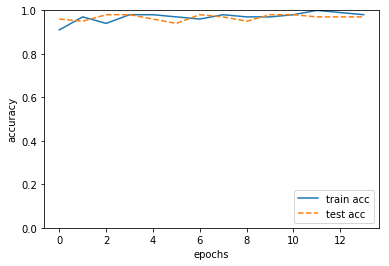

In [46]:
#문제 41. 위의 결과를 그래프로 시각화 하시오 !

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

tf.reset_default_graph()
x = tf.placeholder("float", [None,784])
z_onehot = tf.placeholder("float", [None, 10])
z_label = tf.argmax(z_onehot, axis = 1)

W1 = tf.get_variable(name='W1', shape=[784, 50], \
                     initializer=tf.contrib.layers.variance_scaling_initializer()) # he 초기값
b1 = tf.Variable(tf.ones([50]))
W2 = tf.get_variable(name='W2', shape=[50, 10], \
                     initializer=tf.contrib.layers.variance_scaling_initializer()) # he 초기값
b2 = tf.Variable(tf.ones([10]))
y = tf.matmul(x, W1) + b1
batch_y = tf.contrib.layers.batch_norm(y,True)
y_hat = tf.nn.relu(y)
z = tf.matmul(y_hat, W2) + b2
z_hat = tf.nn.softmax(z)
z_predict = tf.argmax(z_hat, axis = 1)

correction_prediction = tf.equal(z_predict, z_label)
accuracy = tf.reduce_mean(tf.cast(correction_prediction, "float"))
loss = - tf.reduce_sum(z_onehot*tf.log(z_hat), axis = 1)
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
train_acc_list = []
test_acc_list = []

sess = tf.Session()
sess.run(init)
for i in range(1, 15):
    for j in range(1, 601):
        train_xs, train_ys = mnist.train.next_batch(100)
        test_xs, test_ys = mnist.test.next_batch(100)
        sess.run(train, feed_dict = {x : train_xs, z_onehot: train_ys})
    train_acc = sess.run(accuracy, feed_dict = {x : train_xs, z_onehot : train_ys})
    test_acc = sess.run(accuracy, feed_dict = {x : test_xs, z_onehot : test_ys})
    print('train %d 에폭 정확도'%i, train_acc)
    train_acc_list.append(train_acc)
    print('test  %d 에폭 정확도'%i, test_acc)
    test_acc_list.append(test_acc)
    print('========================')

sess.close()

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
train 1 에폭 정확도 0.91
test  1 에폭 정확도 0.93
train 2 에폭 정확도 0.96
test  2 에폭 정확도 0.91
train 3 에폭 정확도 0.96
test  3 에폭 정확도 0.97
train 4 에폭 정확도 0.98
test  4 에폭 정확도 0.95
train 5 에폭 정확도 0.94
test  5 에폭 정확도 0.94
train 6 에폭 정확도 0.95
test  6 에폭 정확도 0.97
train 7 에폭 정확도 0.96
test  7 에폭 정확도 0.98
train 8 에폭 정확도 1.0
test  8 에폭 정확도 0.94
train 9 에폭 정확도 0.96
test  9 에폭 정확도 0.98
train 10 에폭 정확도 0.98
test  10 에폭 정확도 0.95
train 11 에폭 정확도 0.99
test  11 에폭 정확도 0.99
train 12 에폭 정확도 0.97
test  12 에폭 정확도 0.98
train 13 에폭 정확도 1.0
test  13 에폭 정확도 0.95
train 14 에폭 정확도 0.98
test  14 에폭 정확도 0.96


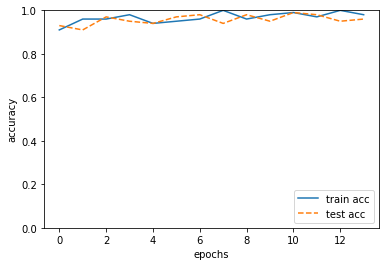

In [66]:
#문제 42. 책 132페이지를 참고해서 훈련을 다 시키고 나서 테스트 데이터를 입려갛도록 코드를 작성하시오 (점심시간 문제)
#드롭아웃은 훈련할때는 50%의 노드로 학습하고 테스트 할때는 100%의 노드로 테스트하게 하시오 !
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

tf.reset_default_graph()
x = tf.placeholder("float", [None,784])
z_onehot = tf.placeholder("float", [None, 10])
z_label = tf.argmax(z_onehot, axis = 1)
keep_prob = tf.placeholder("float")

W1 = tf.get_variable(name='W1', shape=[784, 100], \
                     initializer=tf.contrib.layers.variance_scaling_initializer()) # he 초기값
b1 = tf.Variable(tf.ones([100]))
W2 = tf.get_variable(name='W2', shape=[100, 10], \
                     initializer=tf.contrib.layers.variance_scaling_initializer()) # he 초기값
b2 = tf.Variable(tf.ones([10]))
y = tf.matmul(x, W1) + b1
batch_y = tf.contrib.layers.batch_norm(y,True)
y_hat = tf.nn.relu(y)
y_drop = tf.nn.dropout(y_hat, keep_prob)
z = tf.matmul(y_drop, W2) + b2
z_hat = tf.nn.softmax(z)
z_predict = tf.argmax(z_hat, axis = 1)

correction_prediction = tf.equal(z_predict, z_label)
accuracy = tf.reduce_mean(tf.cast(correction_prediction, "float"))
loss = - tf.reduce_sum(z_onehot*tf.log(z_hat), axis = 1)
optimizer = tf.train.AdamOptimizer(learning_rate=0.0005)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
train_acc_list = []
test_acc_list = []

sess = tf.Session()
sess.run(init)
for i in range(1, 15):
    for j in range(1, 601):
        train_xs, train_ys = mnist.train.next_batch(100)
        test_xs, test_ys = mnist.test.next_batch(100)
        sess.run(train, feed_dict = {x : train_xs, z_onehot: train_ys, keep_prob : 0.8})
    train_acc = sess.run(accuracy, feed_dict = {x : train_xs, z_onehot : train_ys, keep_prob : 1.0})
    print('train %d 에폭 정확도'%i, train_acc)
    train_acc_list.append(train_acc)
    test_acc = sess.run(accuracy, feed_dict = {x : test_xs, z_onehot : test_ys, keep_prob : 1.0})
    print('test  %d 에폭 정확도'%i, test_acc)
    test_acc_list.append(test_acc)
    print('=========================')

sess.close()

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
train   초기 정확도 0.11
test    초기 정확도 0.04
train 1 에폭 정확도 0.94
test  1 에폭 정확도 0.94
train 2 에폭 정확도 0.96
test  2 에폭 정확도 0.95


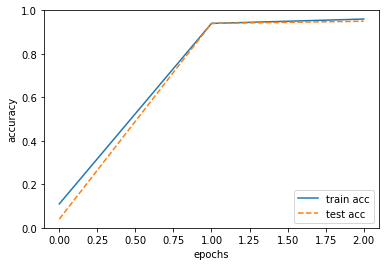

In [4]:
#문제 43. 2층 신경망 ──▶ 3층 신경망으로 변경하고 정확도를 확인하시오 !

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

tf.reset_default_graph()
x = tf.placeholder("float", [None,784])
z_onehot = tf.placeholder("float", [None, 10])
z_label = tf.argmax(z_onehot, axis = 1)
keep_prob = tf.placeholder("float")

W1 = tf.get_variable(name='W1', shape=[784, 100], \
                     initializer=tf.contrib.layers.variance_scaling_initializer())
b1 = tf.Variable(tf.ones([100]))
W2 = tf.get_variable(name='W2', shape=[100, 100], \
                     initializer=tf.contrib.layers.variance_scaling_initializer())
b2 = tf.Variable(tf.ones([100]))

W3 = tf.get_variable(name='W3', shape=[100, 10], \
                     initializer=tf.contrib.layers.variance_scaling_initializer())
b3 = tf.Variable(tf.ones([10]))

y = tf.matmul(x, W1) + b1
batch_y = tf.contrib.layers.batch_norm(y,True)
y_hat = tf.nn.relu(y)
y_drop = tf.nn.dropout(y_hat, keep_prob)
y1 = tf.matmul(y_drop, W2) + b2
y1_hat = tf.nn.relu(y1)
y1_drop = tf.nn.dropout(y1_hat, keep_prob)
z = tf.matmul(y1_drop, W3) + b3
z_hat = tf.nn.softmax(z)
z_predict = tf.argmax(z_hat, axis = 1)

correction_prediction = tf.equal(z_predict, z_label)
accuracy = tf.reduce_mean(tf.cast(correction_prediction, "float"))
loss = - tf.reduce_sum(z_onehot*tf.log(z_hat), axis = 1)
optimizer = tf.train.AdamOptimizer(learning_rate=0.0005)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
train_acc_list = []
test_acc_list = []

sess = tf.Session()
sess.run(init)

train_xs, train_ys = mnist.train.next_batch(100)
test_xs, test_ys = mnist.test.next_batch(100)
train_acc = sess.run(accuracy, \
                     feed_dict = {x : train_xs, z_onehot : train_ys, keep_prob : 1.0})
print('train   초기 정확도', train_acc)
train_acc_list.append(train_acc)
test_acc = sess.run(accuracy, \
                    feed_dict = {x : test_xs, z_onehot : test_ys, keep_prob : 1.0})
print('test    초기 정확도', test_acc)
test_acc_list.append(test_acc)
print('=========================')
for i in range(1, 3):
    for j in range(1, 601):
        train_xs, train_ys = mnist.train.next_batch(100)
        test_xs, test_ys = mnist.test.next_batch(100)
        sess.run(train, feed_dict = {x : train_xs, z_onehot: train_ys, keep_prob : 0.9})
    train_acc = sess.run(accuracy, \
                         feed_dict = {x : train_xs, z_onehot : train_ys, keep_prob : 1.0})
    print('train %d 에폭 정확도'%i, train_acc)
    train_acc_list.append(train_acc)
    test_acc = sess.run(accuracy, \
                        feed_dict = {x : test_xs, z_onehot : test_ys, keep_prob : 1.0})
    print('test  %d 에폭 정확도'%i, test_acc)
    test_acc_list.append(test_acc)
    print('=========================')

sess.close()

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [ ]:
#문제 44. 텐서플로우로 CNN구현하기

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

# 입력층
tf.reset_default_graph()
x_load = tf.placeholder("float", [None, 784])
x = tf.reshape(x_load, [-1 ,28, 28, 1])
z_onehot = tf.placeholder("float", [None, 10])
z_label = tf.argmax(z_onehot, axis = 1)
keep_prob = tf.placeholder("float")

# 은닉 1층
W = tf.get_variable(name='W', shape=[3, 3, 1, 32], \
                     initializer=tf.contrib.layers.variance_scaling_initializer())
b = tf.Variable(tf.ones([28, 28, 32]))

x = tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding = 'SAME')
x = tf.nn.relu(x) + b
x = tf.nn.max_pool(x, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
x = tf.reshape(x, [-1, 6272])



# 은닉 2층
W1 = tf.get_variable(name='W1', shape=[6272, 100], \
                     initializer=tf.contrib.layers.variance_scaling_initializer())
b1 = tf.Variable(tf.ones([100]))

y = tf.matmul(x, W1) + b1
y = tf.contrib.layers.batch_norm(y,True)
y = tf.nn.relu(y)
y = tf.nn.dropout(y, keep_prob)



# 은닉 3층
W2 = tf.get_variable(name='W2', shape=[100, 100], \
                     initializer=tf.contrib.layers.variance_scaling_initializer())
b2 = tf.Variable(tf.ones([100]))

y1 = tf.matmul(y, W2) + b2
y1 = tf.nn.relu(y1)
y1 = tf.nn.dropout(y1, keep_prob)



# 출력층(4층)
W3 = tf.get_variable(name='W3', shape=[100, 10], \
                     initializer=tf.contrib.layers.variance_scaling_initializer())
b3 = tf.Variable(tf.ones([10]))

z = tf.matmul(y1, W3) + b3
z_hat = tf.nn.softmax(z)
z = tf.argmax(z_hat, axis = 1)



correction_prediction = tf.equal(z, z_label)
accuracy = tf.reduce_mean(tf.cast(correction_prediction, "float"))
loss = - tf.reduce_sum(z_onehot*tf.log(z_hat), axis = 1)
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
train_acc_list = []
test_acc_list = []


# 세션 활성화
sess = tf.Session()
sess.run(init)

train_xs, train_ys = mnist.train.next_batch(100)
test_xs, test_ys = mnist.test.next_batch(100)
train_acc = sess.run(accuracy, \
                     feed_dict = {x_load : train_xs, z_onehot : train_ys, keep_prob : 1.0})
print('train   초기 정확도', train_acc)
train_acc_list.append(train_acc)
test_acc = sess.run(accuracy, \
                    feed_dict = {x_load : test_xs, z_onehot : test_ys, keep_prob : 1.0})
print('test    초기 정확도', test_acc)
test_acc_list.append(test_acc)
print('=========================')
for i in range(1, 16):
    for j in range(1, 601):
        train_xs, train_ys = mnist.train.next_batch(100)
        test_xs, test_ys = mnist.test.next_batch(100)
        sess.run(train, feed_dict = {x_load : train_xs, z_onehot: train_ys, keep_prob : 0.9})
    train_acc = sess.run(accuracy, \
                         feed_dict = {x_load : train_xs, z_onehot : train_ys, keep_prob : 1.0})
    print('train %d 에폭 정확도'%i, train_acc)
    train_acc_list.append(train_acc)
    test_acc = sess.run(accuracy, \
                        feed_dict = {x_load : test_xs, z_onehot : test_ys, keep_prob : 1.0})
    print('test  %d 에폭 정확도'%i, test_acc)
    test_acc_list.append(test_acc)
    print('=========================')

sess.close()



# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
train   초기 정확도 0.1
test    초기 정확도 0.09


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
train   초기 정확도 0.11
test    초기 정확도 0.1
train 1 에폭 정확도 0.99
test  1 에폭 정확도 0.98
train 2 에폭 정확도 1.0
test  2 에폭 정확도 1.0
train 3 에폭 정확도 1.0
test  3 에폭 정확도 1.0
train 4 에폭 정확도 1.0
test  4 에폭 정확도 0.99
train 5 에폭 정확도 0.99
test  5 에폭 정확도 1.0
train 6 에폭 정확도 1.0
test  6 에폭 정확도 0.99
train 7 에폭 정확도 1.0
test  7 에폭 정확도 0.99
train 8 에폭 정확도 1.0
test  8 에폭 정확도 0.97
train 9 에폭 정확도 1.0
test  9 에폭 정확도 1.0
train 10 에폭 정확도 0.98
test  10 에폭 정확도 0.99
train 11 에폭 정확도 1.0
test  11 에폭 정확도 1.0
train 12 에폭 정확도 1.0
test  12 에폭 정확도 1.0
train 13 에폭 정확도 1.0
test  13 에폭 정확도 1.0
train 14 에폭 정확도 1.0
test  14 에폭 정확도 1.0
train 15 에폭 정확도 1.0
test  15 에폭 정확도 0.98


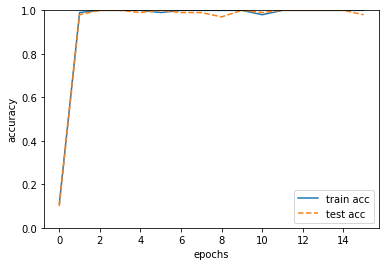

In [8]:
#문제 44. 문제 43번 4층 신경망에 conv-poling 층을 하나 더 추가해서 5층으로 변경을하고 gpu에서 돌리시오 !

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

# 입력층
tf.reset_default_graph()
x_load = tf.placeholder("float", [None, 784])
x = tf.reshape(x_load, [-1 ,28, 28, 1])
z_onehot = tf.placeholder("float", [None, 10])
z_label = tf.argmax(z_onehot, axis = 1)
keep_prob = tf.placeholder("float")

# 은닉 1층
W1 = tf.get_variable(name='W1', shape=[3, 3, 1, 32], \
                     initializer=tf.contrib.layers.variance_scaling_initializer())
b1 = tf.Variable(tf.ones([28, 28, 32]))

x = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding = 'SAME')
x = tf.nn.relu(x) + b1
x = tf.nn.max_pool(x, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
# x = tf.reshape(x, [-1, 6272])



# 은닉 2층
W2 = tf.get_variable(name='W2', shape=[3, 3, 32, 64], \
                     initializer=tf.contrib.layers.variance_scaling_initializer())
b2 = tf.Variable(tf.ones([14, 14, 64]))

x1 = tf.nn.conv2d(x, W2, strides=[1, 1, 1, 1], padding = 'SAME')
x1 = tf.nn.relu(x1) + b2
x1 = tf.nn.max_pool(x1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
x1 = tf.reshape(x1, [-1, 3136])



# 은닉 3층
W3 = tf.get_variable(name='W3', shape=[3136, 100], \
                     initializer=tf.contrib.layers.variance_scaling_initializer())
b3 = tf.Variable(tf.ones([100]))

y = tf.matmul(x1, W3) + b3
y = tf.contrib.layers.batch_norm(y,True)
y = tf.nn.relu(y)
y = tf.nn.dropout(y, keep_prob)



# 은닉 3층
W4 = tf.get_variable(name='W4', shape=[100, 100], \
                     initializer=tf.contrib.layers.variance_scaling_initializer())
b4 = tf.Variable(tf.ones([100]))

y1 = tf.matmul(y, W4) + b4
y1 = tf.nn.relu(y1)
y1 = tf.nn.dropout(y1, keep_prob)



# 출력층(4층)
W5 = tf.get_variable(name='W5', shape=[100, 10], \
                     initializer=tf.contrib.layers.variance_scaling_initializer())
b5 = tf.Variable(tf.ones([10]))

z = tf.matmul(y1, W5) + b5
z_hat = tf.nn.softmax(z)
z = tf.argmax(z_hat, axis = 1)



correction_prediction = tf.equal(z, z_label)
accuracy = tf.reduce_mean(tf.cast(correction_prediction, "float"))
loss = - tf.reduce_sum(z_onehot*tf.log(z_hat), axis = 1)
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
train_acc_list = []
test_acc_list = []


# 세션 활성화
sess = tf.Session()
sess.run(init)

train_xs, train_ys = mnist.train.next_batch(100)
test_xs, test_ys = mnist.test.next_batch(100)
train_acc = sess.run(accuracy, \
                     feed_dict = {x_load : train_xs, z_onehot : train_ys, keep_prob : 1.0})
print('train   초기 정확도', train_acc)
train_acc_list.append(train_acc)
test_acc = sess.run(accuracy, \
                    feed_dict = {x_load : test_xs, z_onehot : test_ys, keep_prob : 1.0})
print('test    초기 정확도', test_acc)
test_acc_list.append(test_acc)
print('=========================')
for i in range(1, 16):
    for j in range(1, 601):
        train_xs, train_ys = mnist.train.next_batch(100)
        test_xs, test_ys = mnist.test.next_batch(100)
        sess.run(train, feed_dict = {x_load : train_xs, z_onehot: train_ys, keep_prob : 0.9})
    train_acc = sess.run(accuracy, \
                         feed_dict = {x_load : train_xs, z_onehot : train_ys, keep_prob : 1.0})
    print('train %d 에폭 정확도'%i, train_acc)
    train_acc_list.append(train_acc)
    test_acc = sess.run(accuracy, \
                        feed_dict = {x_load : test_xs, z_onehot : test_ys, keep_prob : 1.0})
    print('test  %d 에폭 정확도'%i, test_acc)
    test_acc_list.append(test_acc)
    print('=========================')

sess.close()



# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [11]:
# 문제 45. c:\a\cifar10\test 폴더를 만들고 test이미지 100개를 이 폴더에 따로 복사하고 복사한 이미지를 아래와 같이 불러오는 함수를 생성하시오 !

import os

test_image = "c:\\a\\cifar10\\test"

def image_load(path):
    file_list = os.listdir(path)
    return file_list
    
print(image_load(test_image))

['1.png', '10.png', '100.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png', '2.png', '20.png', '21.png', '22.png', '23.png', '24.png', '25.png', '26.png', '27.png', '28.png', '29.png', '3.png', '30.png', '31.png', '32.png', '33.png', '34.png', '35.png', '36.png', '37.png', '38.png', '39.png', '4.png', '40.png', '41.png', '42.png', '43.png', '44.png', '45.png', '46.png', '47.png', '48.png', '49.png', '5.png', '50.png', '51.png', '52.png', '53.png', '54.png', '55.png', '56.png', '57.png', '58.png', '59.png', '6.png', '60.png', '61.png', '62.png', '63.png', '64.png', '65.png', '66.png', '67.png', '68.png', '69.png', '7.png', '70.png', '71.png', '72.png', '73.png', '74.png', '75.png', '76.png', '77.png', '78.png', '79.png', '8.png', '80.png', '81.png', '82.png', '83.png', '84.png', '85.png', '86.png', '87.png', '88.png', '89.png', '9.png', '90.png', '91.png', '92.png', '93.png', '94.png', '95.png', '96.png', '97.png', '98.png', '99.png']


In [17]:
#문제 46. 위의 함수를 수정해서 아래와 같이 숫자만 출력되게 하시오 !

import os

test_image = "c:\\a\\cifar10\\test"

def image_load(path):
    file_list = os.listdir(path)
    for i in range(len(file_list)):
        file_list[i] = int(file_list[i][:-4])
    return file_list
    
print(image_load(test_image))

[1, 10, 100, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 5, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 6, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 7, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 8, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 9, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [18]:
#문제 47. 아래의 결과를 정렬해서 출력되게 하시오 !

import os

test_image = "c:\\a\\cifar10\\test"

def image_load(path):
    file_list = os.listdir(path)
    for i in range(len(file_list)):
        file_list[i] = int(file_list[i][:-4])
    file_list.sort()
    return file_list
    
print(image_load(test_image))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [19]:
#문제 48. 문제 47번에 나온 결과에 png를 붙여서 아래와 같이 결과가 출력되게 하시오 !

import os

test_image = "c:\\a\\cifar10\\test"

def image_load(path):
    file_list = os.listdir(path)
    for i in range(len(file_list)):
        file_list[i] = int(file_list[i][:-4])
    file_list.sort()
    for i in range(len(file_list)):
        file_list[i] = str(file_list[i]) + ".png"
    return file_list
    
print(image_load(test_image))

['1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png', '20.png', '21.png', '22.png', '23.png', '24.png', '25.png', '26.png', '27.png', '28.png', '29.png', '30.png', '31.png', '32.png', '33.png', '34.png', '35.png', '36.png', '37.png', '38.png', '39.png', '40.png', '41.png', '42.png', '43.png', '44.png', '45.png', '46.png', '47.png', '48.png', '49.png', '50.png', '51.png', '52.png', '53.png', '54.png', '55.png', '56.png', '57.png', '58.png', '59.png', '60.png', '61.png', '62.png', '63.png', '64.png', '65.png', '66.png', '67.png', '68.png', '69.png', '70.png', '71.png', '72.png', '73.png', '74.png', '75.png', '76.png', '77.png', '78.png', '79.png', '80.png', '81.png', '82.png', '83.png', '84.png', '85.png', '86.png', '87.png', '88.png', '89.png', '90.png', '91.png', '92.png', '93.png', '94.png', '95.png', '96.png', '97.png', '98.png', '99.png', '100.png']


In [2]:
#문제 49. 이미지 이름 앞에 절대경로가 아래처럼 붙게 하시오 !

import os

test_image = "c:\\a\\cifar10\\test"

def image_load(path):
    file_list = os.listdir(path)
    for i in range(len(file_list)):
        file_list[i] = int(file_list[i][:-4])
    file_list.sort()
    for i in range(len(file_list)):
        file_list[i] = path + "\\" + str(file_list[i]) + ".png"
    return file_list
    
print(image_load(test_image))

['c:\\a\\cifar10\\test\\1.png', 'c:\\a\\cifar10\\test\\2.png', 'c:\\a\\cifar10\\test\\3.png', 'c:\\a\\cifar10\\test\\4.png', 'c:\\a\\cifar10\\test\\5.png', 'c:\\a\\cifar10\\test\\6.png', 'c:\\a\\cifar10\\test\\7.png', 'c:\\a\\cifar10\\test\\8.png', 'c:\\a\\cifar10\\test\\9.png', 'c:\\a\\cifar10\\test\\10.png', 'c:\\a\\cifar10\\test\\11.png', 'c:\\a\\cifar10\\test\\12.png', 'c:\\a\\cifar10\\test\\13.png', 'c:\\a\\cifar10\\test\\14.png', 'c:\\a\\cifar10\\test\\15.png', 'c:\\a\\cifar10\\test\\16.png', 'c:\\a\\cifar10\\test\\17.png', 'c:\\a\\cifar10\\test\\18.png', 'c:\\a\\cifar10\\test\\19.png', 'c:\\a\\cifar10\\test\\20.png', 'c:\\a\\cifar10\\test\\21.png', 'c:\\a\\cifar10\\test\\22.png', 'c:\\a\\cifar10\\test\\23.png', 'c:\\a\\cifar10\\test\\24.png', 'c:\\a\\cifar10\\test\\25.png', 'c:\\a\\cifar10\\test\\26.png', 'c:\\a\\cifar10\\test\\27.png', 'c:\\a\\cifar10\\test\\28.png', 'c:\\a\\cifar10\\test\\29.png', 'c:\\a\\cifar10\\test\\30.png', 'c:\\a\\cifar10\\test\\31.png', 'c:\\a\\cifar10\

In [7]:
#문제 50. 위의 이미지들을 cv2.imread 함수를 이용해서 숫자 list로 변환하시오 !

import os
import numpy as np
import cv2

test_image = "c:\\a\\cifar10\\test"

def image_load(path):
    file_list = os.listdir(path)
    for i in range(len(file_list)):
        file_list[i] = int(file_list[i][:-4])
    file_list.sort()
    for i in range(len(file_list)):
        file_list[i] = path + "\\" + str(file_list[i]) + ".png"
    image =[]
    for i in file_list:
        img = cv2.imread(i)
        image.append(img)
    return image
    
print(image_load(test_image))

[array([[[ 49, 112, 158],
        [ 47, 111, 159],
        [ 51, 116, 165],
        ...,
        [ 36,  95, 137],
        [ 36,  91, 126],
        [ 33,  85, 116]],

       [[ 51, 112, 152],
        [ 40, 110, 151],
        [ 45, 114, 159],
        ...,
        [ 31,  95, 136],
        [ 32,  91, 125],
        [ 34,  88, 119]],

       [[ 47, 110, 151],
        [ 33, 109, 151],
        [ 36, 111, 158],
        ...,
        [ 34,  98, 139],
        [ 34,  95, 130],
        [ 33,  89, 120]],

       ...,

       [[177, 124,  68],
        [148, 100,  42],
        [137,  88,  31],
        ...,
        [146,  97,  38],
        [108,  64,  13],
        [127,  85,  40]],

       [[168, 116,  61],
        [148, 102,  49],
        [132,  85,  35],
        ...,
        [130,  82,  26],
        [126,  82,  29],
        [107,  64,  20]],

       [[160, 107,  54],
        [149, 105,  56],
        [132,  89,  45],
        ...,
        [124,  77,  24],
        [129,  84,  34],
        [110,  67,  21]

In [10]:
#문제 51. 위의 숫자 list를 numpy배열로 변환헤서 출력되게 하시오 !

import os
import numpy as np
import cv2

test_image = "c:\\a\\cifar10\\test"

def image_load(path):
    file_list = os.listdir(path)
    for i in range(len(file_list)):
        file_list[i] = int(file_list[i][:-4])
    file_list.sort()
    for i in range(len(file_list)):
        file_list[i] = path + "\\" + str(file_list[i]) + ".png"
    image =[]
    for i in file_list:
        img = cv2.imread(i)
        image.append(img)
    image = np.array(image)
    return image
    
print(image_load(test_image).shape)

(100, 32, 32, 3)
